In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()

In [ ]:
# Adding Data to Data frame
iris_df = pd.DataFrame(data= iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#appending target to dataframe
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#finding null values in dataset
iris_df.isnull()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [ ]:
# Counting null values
null_values = iris_df.isnull().sum()
print(null_values)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


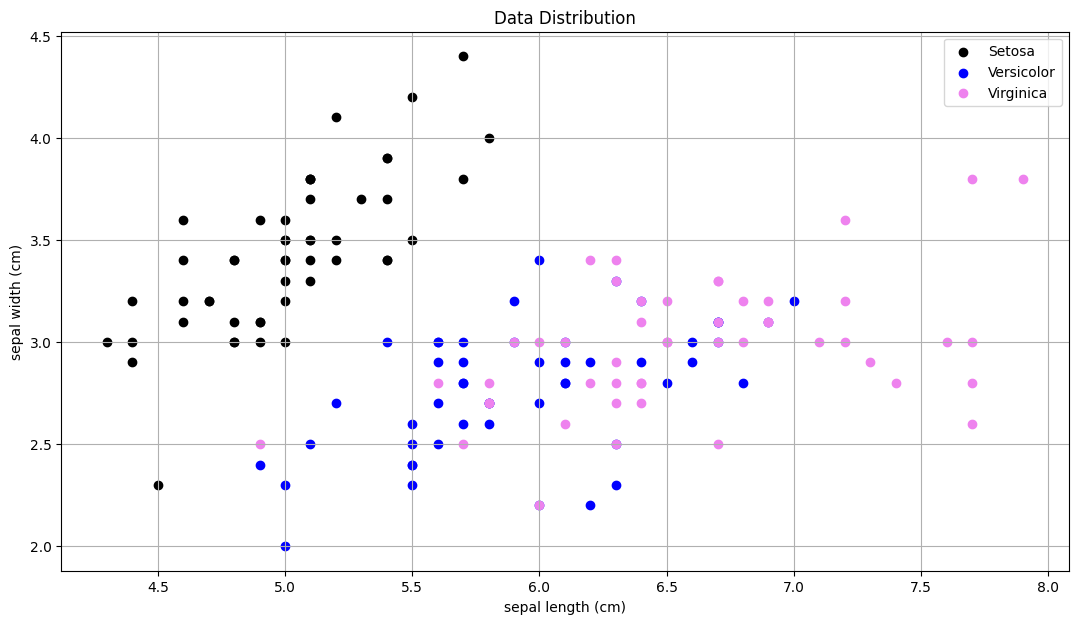

In [ ]:
# Data Visualization
X = iris.data[:, [0,1]]#Using petal length and petal width for easy visualization
y = iris.target


fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(X[y == 0,0], X[y == 0,1], label="Setosa", facecolor="black")
ax.scatter(X[y == 1,0], X[y == 1,1], label="Versicolor", facecolor="blue")
ax.scatter(X[y == 2,0], X[y == 2,1], label="Virginica", facecolor="violet")

ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("sepal width (cm)")
ax.grid()
ax.set_title("Data Distribution")
ax.legend()

In [ ]:
# Scaling Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)

In [ ]:
X = X_scaled
y = iris.target

In [ ]:
# Split the scaled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# SVM Implementation, metrics evaluation, cross-validation score

kernels = ['linear', 'poly', 'rbf']#List of kernels

for kernel in kernels:
    # Create an SVM classifier with the given kernel
    svm = SVC(kernel=kernel)

    # Train the classifier
    svm.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm.predict(X_test)

    # Evaluate the performance
    print(f"Kernel: {kernel}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Apply K-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    cv_scores = cross_val_score(svm, X_train, y_train, cv=kf)
    print(cv_scores)
    print("Mean CV accuracy:", cv_scores.mean())

Kernel: linear
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

[0.95238095 0.9047619  1.         0.95238095 0.95238095]
Mean CV accuracy: 0.9523809523809523
Kernel: poly
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg   

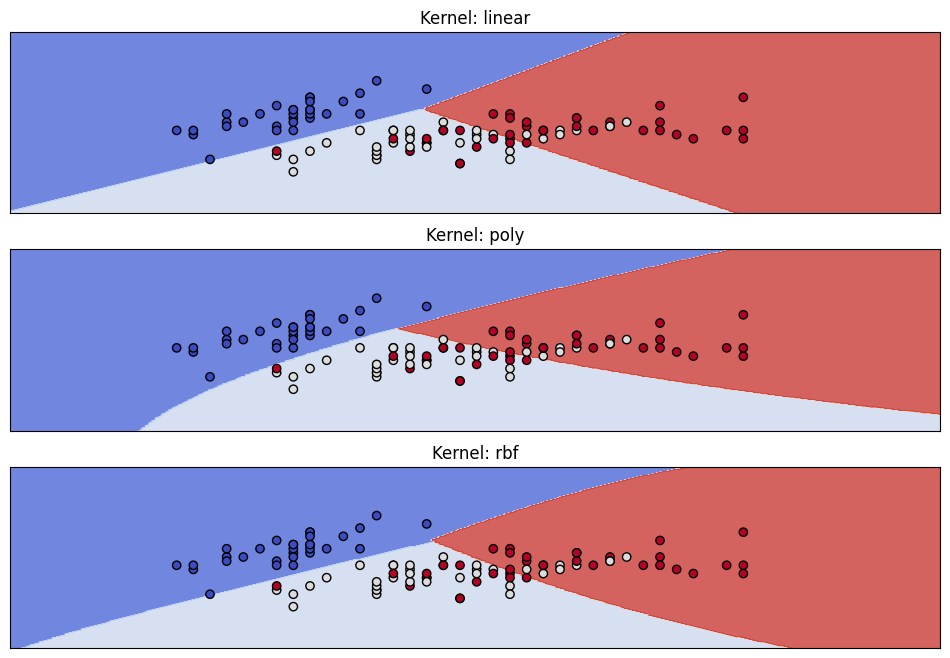

In [ ]:
# SVM Classification
X = iris.data[:, :2] # We only take the first two features for visualization
y = iris.target

# Split the scaled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
kernels = ['linear', 'poly', 'rbf']

# Create a mesh to plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Plot the decision boundaries for each kernel
fig, axes = plt.subplots(3, 1, figsize=(12, 8))
for kernel, ax in zip(kernels, axes.ravel()):
    # Create an SVM classifier with the given kernel
    svm = SVC(kernel=kernel)

    # Fit the classifier to the training data
    svm.fit(X_train, y_train)

    # Plot the decision boundary
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot the training data
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(f'Kernel: {kernel}')
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()